# Fuel Efficiency Analysis

## Best Subset Selection (Instructor)

In [1]:
# look at the docs for the Auto dataset
# https://www.rdocumentation.org/packages/ISLR/versions/1.2/topics/Auto

In [2]:
# rename the dataset's variable and see some information about the dataset
auto = read.csv("ISLR_auto_raw.csv")
names(auto)
dim(auto)

[1] "mpg"          "cylinders"    "displacement" "horsepower"   "weight"      
[6] "acceleration" "year"         "origin"       "name"

[1] 392   9

In [3]:
# convert origin to a factor
auto$origin = factor(auto$origin)

In [4]:
# see the first 10 rows to identify duplicate names
head(auto[order(auto$name),], 10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
96,13.0,8,360,175,3821,11.0,73,1,amc ambassador brougham
10,15.0,8,390,190,3850,8.5,70,1,amc ambassador dpl
66,17.0,8,304,150,3672,11.5,72,1,amc ambassador sst
256,19.4,6,232,90,3210,17.2,78,1,amc concord
314,24.3,4,151,90,3003,20.1,80,1,amc concord
260,18.1,6,258,120,3410,15.1,78,1,amc concord d/l
282,20.2,6,232,90,3265,18.2,79,1,amc concord dl 6
25,21.0,6,199,90,2648,15.0,70,1,amc gremlin
33,19.0,6,232,100,2634,13.0,71,1,amc gremlin
107,18.0,6,232,100,2789,15.0,73,1,amc gremlin


In [5]:
# create a new column with the name and year concatenated
auto$name_year = paste(auto$name, auto$year)

In [6]:
# see all of the duplicated name_years
auto[duplicated(auto$name_year) | duplicated(auto$name_year, fromLast=TRUE),] 

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,name_year
167,23.0,4,140,83,2639,17.0,75,1,ford pinto,ford pinto 75
173,18.0,6,171,97,2984,14.5,75,1,ford pinto,ford pinto 75
335,27.2,4,135,84,2490,15.7,81,1,plymouth reliant,plymouth reliant 81
339,30.0,4,135,84,2385,12.9,81,1,plymouth reliant,plymouth reliant 81


In [7]:
# keep only the first duplicate, drop the rest
auto = auto[!duplicated(auto$name_year),]

In [8]:
# set name_year as the index
rownames(auto) = auto$name_year
auto$name_year = NULL
auto$name= NULL
head(auto)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
chevrolet chevelle malibu 70,18,8,307,130,3504,12.0,70,1
buick skylark 320 70,15,8,350,165,3693,11.5,70,1
plymouth satellite 70,18,8,318,150,3436,11.0,70,1
amc rebel sst 70,16,8,304,150,3433,12.0,70,1
ford torino 70,17,8,302,140,3449,10.5,70,1
ford galaxie 500 70,15,8,429,198,4341,10.0,70,1


In [9]:
# write the cleaned data
write.csv(auto, "ISLR_auto_clean.csv")

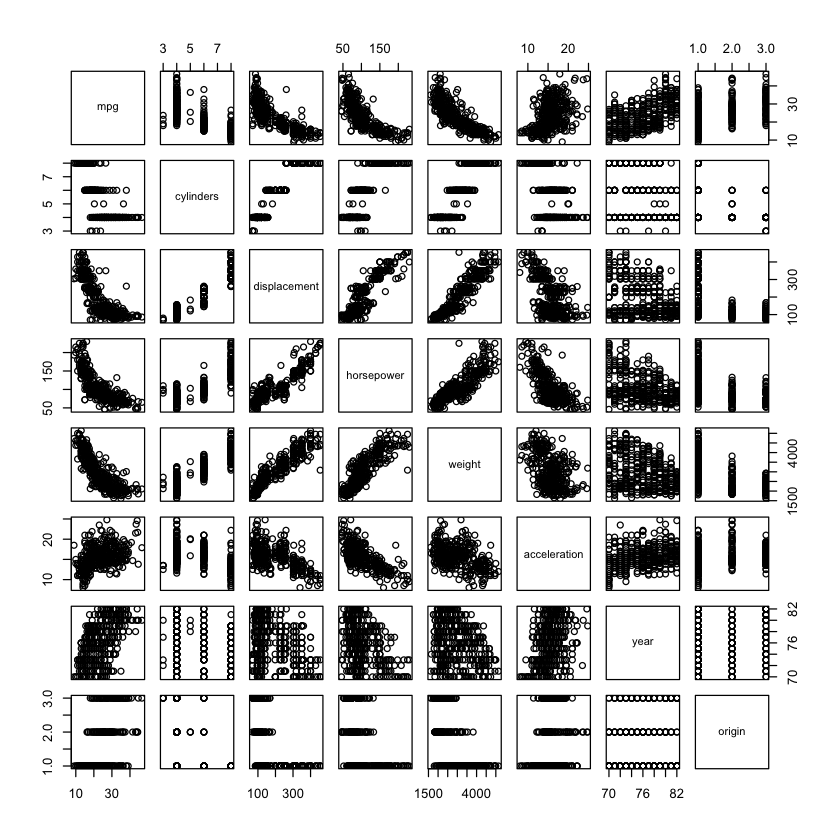

In [10]:
# plot the pairwise scatter plots
plot(auto)

In [11]:
# load the leaps library which is available in conda's r channel
# see the instructions in install-instructions/README.md
library(leaps)

In [12]:
# use subset selection to find the best model for mpg for every number of variables

to = proc.time()

reg_fit_full = regsubsets(mpg ~ ., data=auto)
tf = proc.time()
tf - to

reg_summary = summary(reg_fit_full)
reg_summary

   user  system elapsed 
  0.007   0.000   0.007 

Subset selection object
Call: regsubsets.formula(mpg ~ ., data = auto)
8 Variables  (and intercept)
             Forced in Forced out
cylinders        FALSE      FALSE
displacement     FALSE      FALSE
horsepower       FALSE      FALSE
weight           FALSE      FALSE
acceleration     FALSE      FALSE
year             FALSE      FALSE
origin2          FALSE      FALSE
origin3          FALSE      FALSE
1 subsets of each size up to 8
Selection Algorithm: exhaustive
         cylinders displacement horsepower weight acceleration year origin2
1  ( 1 ) " "       " "          " "        "*"    " "          " "  " "    
2  ( 1 ) " "       " "          " "        "*"    " "          "*"  " "    
3  ( 1 ) " "       " "          " "        "*"    " "          "*"  " "    
4  ( 1 ) " "       " "          " "        "*"    " "          "*"  "*"    
5  ( 1 ) " "       "*"          " "        "*"    " "          "*"  "*"    
6  ( 1 ) " "       "*"          "*"        "*"    " "          "*"  "*"    

In [13]:
# see the R-squared for the best model with idx variables
reg_summary$rsq

[1] 0.6930907 0.8085710 0.8124896 0.8191138 0.8206201 0.8227384 0.8237454
[8] 0.8240115

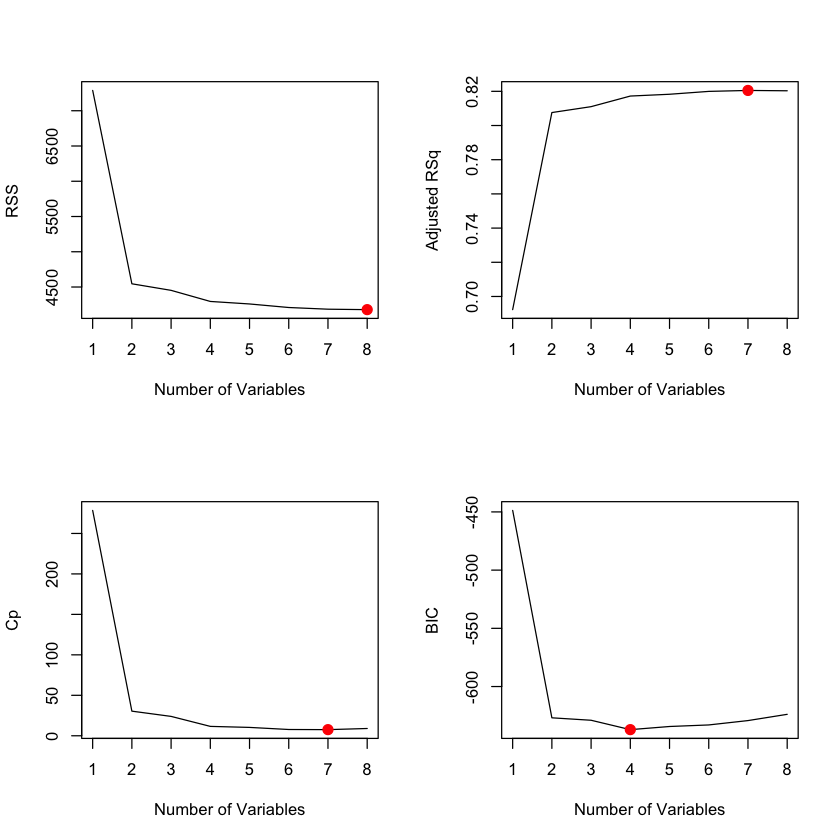

In [14]:
# plot number of variables for the best model against the associated RSS, Adjusted R-Squared, Cp and BIC. 
par(mfrow=c(2, 2))

plot(reg_summary$rss, xlab="Number of Variables", ylab="RSS", type="l")
points(
    which.min(reg_summary$rss),
    min(reg_summary$rss),
    col="red",
    cex=2,
    pch=20
)

plot(reg_summary$adjr2, xlab="Number of Variables", ylab="Adjusted RSq", type="l")
points(
    which.max(reg_summary$adjr2),
    max(reg_summary$adjr2),
    col="red",
    cex=2,
    pch=20
)

plot(reg_summary$cp, xlab="Number of Variables", ylab="Cp", type="l")
points(
    which.min(reg_summary$cp),
    min(reg_summary$cp),
    col="red",
    cex=2,
    pch=20
)

plot(reg_summary$bic, xlab="Number of Variables", ylab="BIC", type="l")
points(
    which.min(reg_summary$bic),
    min(reg_summary$bic),
    col="red",
    cex=2,
    pch=20
)

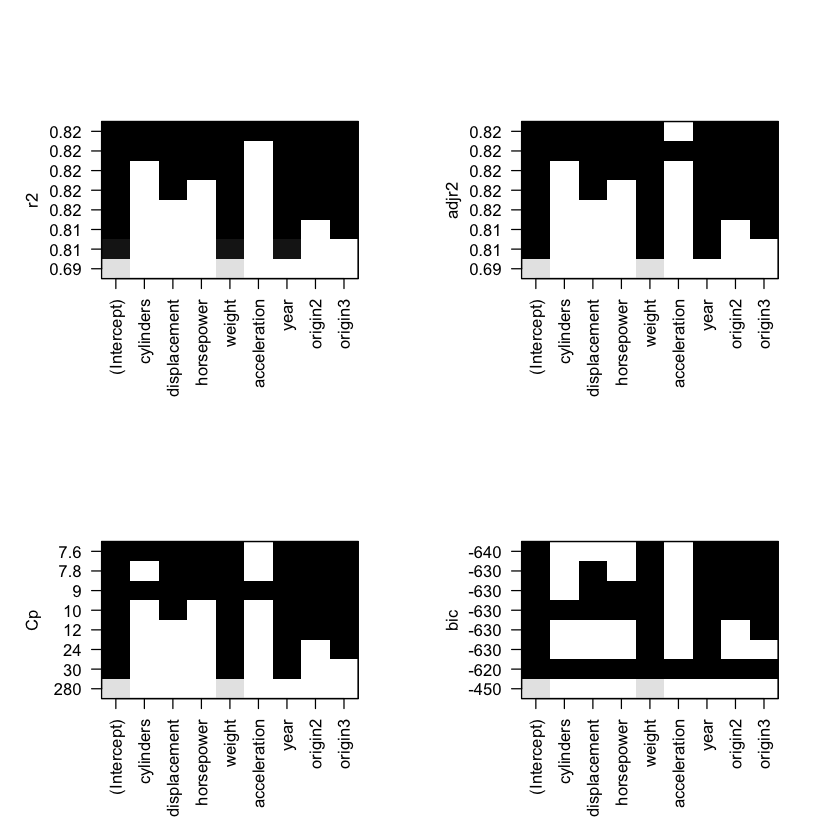

In [15]:
# use the built-in plot function to plot the best models against their associated fit metrics
par(mfrow = c(2,2))
plot(reg_fit_full, scale="r2")
plot(reg_fit_full, scale="adjr2")
plot(reg_fit_full, scale="Cp")
plot(reg_fit_full, scale="bic")

In [16]:
# see the coefficients for the best model with 4 variable
coef(reg_fit_full, 4)

(Intercept)        weight          year       origin2       origin3 
-18.186253046  -0.005897019   0.768910342   1.950996256   2.188756535